In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('SEM_KeyWord_Dataset.csv')

In [3]:
df = df.dropna()

df['CTR'] = df['CTR'].apply(lambda x: float(str(x).replace('%', '')))

df = df.dropna()

df['Market'] = pd.get_dummies(df['Market'])

In [4]:
print(df['Market'].nunique())
print(df['Market'].value_counts())

2
0    229163
1    123377
Name: Market, dtype: int64


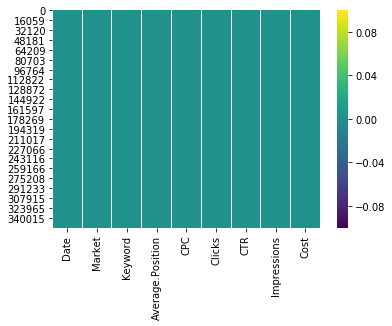

In [5]:
sns.heatmap(df.isnull(), cmap = 'viridis')

In [6]:
new_df = df[df['CPC'] != 0]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203595 entries, 1 to 356039
Data columns (total 9 columns):
Date                203595 non-null int64
Market              203595 non-null uint8
Keyword             203595 non-null object
Average.Position    203595 non-null float64
CPC                 203595 non-null float64
Clicks              203595 non-null float64
CTR                 203595 non-null float64
Impressions         203595 non-null float64
Cost                203595 non-null float64
dtypes: float64(6), int64(1), object(1), uint8(1)
memory usage: 14.2+ MB


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
from sklearn.utils import shuffle

In [9]:
new_df = shuffle(new_df)
new_df.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
8918,20120618,0,lease management software,1.0,1.36,14.95,8.1,184.0,20.30
11344,20120624,0,finepix fujifilm,1.0,0.50,5.54,3.9,141.0,2.77
238991,20120805,1,motorcycle insurance,1.0,20.44,126.36,4.5,2785.0,2583.11
137790,20120910,0,criminal defense attorney,1.0,74.75,44.96,0.6,7296.0,3360.87
299455,20121112,1,make money from home,1.0,2.17,24.36,2.5,967.0,52.84


In [10]:
X = new_df.drop(['Date', 'Clicks', 'Keyword'], axis = 1)
y = new_df['Clicks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
predictions = model.predict(X_test)

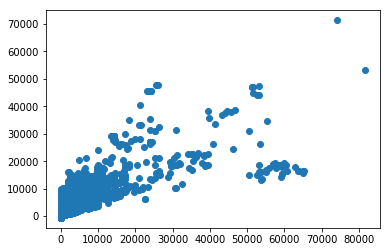

In [14]:
from sklearn import metrics

plt.scatter(y_test, predictions)

In [15]:
metrics.mean_absolute_error(y_test, predictions)

258.0717641675869

In [16]:
(metrics.mean_squared_error(y_test, predictions) ** 0.5)

1293.6402848967352

/home/umairshah/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


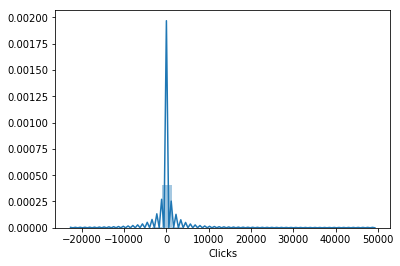

In [17]:
sns.distplot((y_test-predictions), bins = 30)

In [18]:
metrics.r2_score(y_test, predictions)

0.6698527905331613

## Correlations:

In [19]:
corr = new_df.corr()

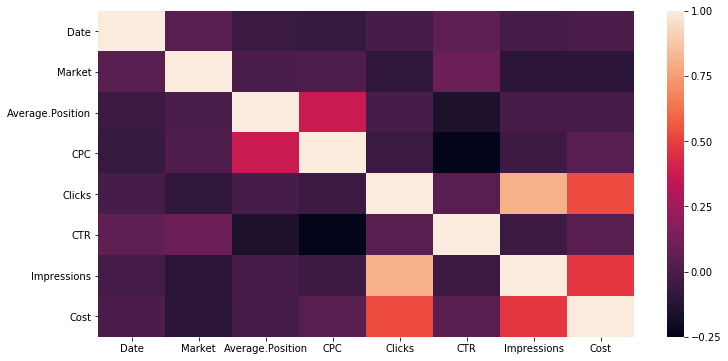

In [20]:
plt.figure(figsize = (12,6))
sns.heatmap(corr)

In [21]:
new_df['Clicks'].corr(new_df['Cost'])

0.5307991295567499

In [22]:
X1 = new_df.drop(['Date', 'CTR', 'Average.Position', 'Clicks'], axis = 1)
y1 = new_df['Clicks']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=101)

In [23]:
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
predictions = model.predict(X_test)

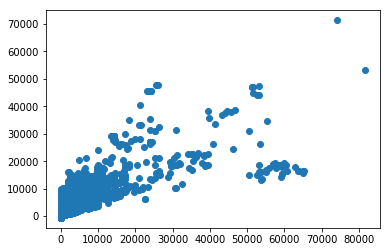

In [26]:
from sklearn import metrics
plt.scatter(y_test, predictions)

In [27]:
metrics.mean_absolute_error(y_test, predictions)

258.0717641675869

In [28]:
(metrics.mean_squared_error(y_test, predictions) ** 0.5)

1293.6402848967352

/home/umairshah/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


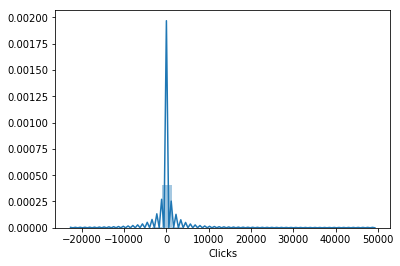

In [29]:
sns.distplot((y_test-predictions), bins = 30)

In [30]:
metrics.r2_score(y_test, predictions)

0.6698527905331613

## Ridge Regression:

In [31]:
from sklearn import linear_model

reg = linear_model.LassoLars(alpha = 0.1)

reg.fit(X_train, y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [32]:
reg_predictions = reg.predict(X_test)

In [33]:
metrics.r2_score(y_test, reg_predictions)

0.6689706030065692

## Keyword Preprocessing

In [34]:
words_list = list(df['Keyword'])

final_list = []

for segment in words_list:
    new_list = segment.split()
    for i in new_list:
        final_list.append(i)
        
len(final_list)

955767

In [36]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load('en_core_web_sm')

def remove_stops(text):
    my_doc = nlp(text)
    token_list = []
    filtered_sentence = []
    
    for token in my_doc:
        token_list.append(token.text)
        
    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
            
    return " ".join(filtered_sentence)

In [37]:
remove_stops("tracking a vehicle")

'tracking vehicle'

In [38]:
new_df['Keyword'].head()

8918      lease management software
11344              finepix fujifilm
238991         motorcycle insurance
137790    criminal defense attorney
299455         make money from home
Name: Keyword, dtype: object

In [43]:
new_df['Keyword'][10:100].apply(remove_stops)

57796                     apps development
307673                    currency trading
10169                           csl plasma
115573                          auto loans
14182                             hcg diet
130712                         scott trade
346504                    direct insurance
172857                     state insurance
222914                             skynews
189881                  insurance policies
204171              stock trading software
221942       home equity line credit rates
298230                               money
94916            consolidate student loans
77344                               donate
337668                          cash loans
180466                         equity loan
148648                      college credit
348002              group health insurance
167998                             hosting
233261                   cash credit cards
214624                  hard money lenders
31213                                  nfp
150469     